# Telco Customer Churn Analysis

By Yujia

7/2022

## 1. Loading data and libraries

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [37]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split 

In [161]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, auc, roc_curve #classification

In [5]:
sns.set(style='whitegrid')

In [88]:
df = pd.read_csv('churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Exploratory data analysis

### Data clearning

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [90]:
#convert data types if necessary

#total charges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [91]:
#check null value
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [92]:
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [93]:
#check is there is any other 0 value for Tenure column
df[df['tenure'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [94]:
#we could remove those with missing value in tenure
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Int64Index([], dtype='int64')

In [97]:
#now check missing value again
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We could consider to drop Customer ID.

In [104]:
df2 = df.iloc[:,1:] 
#or: df2 = df.drop(['customerID'], axis=1)

In [105]:
#convert data types
df2['Churn'].replace(to_replace = 'Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace = 'No', value=0, inplace=True)

In [107]:
#dummy variables
df_dum = pd.get_dummies(df2)
df_dum.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


### Data visualization

**1. Gender**

There is no obvious difference in churn possibility among genders.

In [121]:
fig = px.histogram(df2, x="Churn", color="gender", barmode="group", title="<b>Gender distribution</b>")
fig.update_layout(width=400, height=350, bargap=0.1)
fig.show();

**2. Contract**

Users choosing shorter contract(e.g. month-by-month) are easier to churn compared with longer contract customers.

In [122]:
fig = px.histogram(df2, x="Churn", color="Contract", barmode="group", title="<b>Contract distribution</b>")
fig.update_layout(width=500, height=350, bargap=0.1)
fig.show();

**3. Payment Method**

Customers using electronic check are more likely to leave compared with other payment methods.

In [123]:
labels = df2['PaymentMethod'].unique()
values = df2['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [127]:
fig = px.histogram(df2, x="Churn", color="PaymentMethod", barmode="group", title="<b>Payment Method distribution</b>")
fig.update_layout(width=500, height=350, bargap=0.1)
fig.show();

**4. Internet Service**

Among all service providers, it seems Fiber optic may cause higher churn rate.

In [124]:
fig = px.histogram(df2, x="Churn", color="InternetService", barmode="group", title="<b>Internet Service distribution</b>")
fig.update_layout(width=500, height=350, bargap=0.1)
fig.show();

**5. Dependents**

Those with no dependents are easier to leave.

In [125]:
fig = px.histogram(df2, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>")
fig.update_layout(width=400, height=350, bargap=0.1)
fig.show();

**6. Partners**

Similar to dependents, those with no partners are more likely to opt out.

In [126]:
fig = px.histogram(df2, x="Churn", color="Partner", barmode="group", title="<b>Partner distribution</b>")
fig.update_layout(width=400, height=350, bargap=0.1)
fig.show();

**7. Senior citizen**

Though most users are not senior citizens, we observed that higher percent of churn users in seniors.

In [128]:
fig = px.histogram(df2, x="Churn", color="SeniorCitizen", barmode="group", title="<b>Senior Citizen distribution</b>")
fig.update_layout(width=400, height=350, bargap=0.1)
fig.show();

**8. Paperless billing**

It seems customers with paperless billing are more likely to leave.

In [129]:
fig = px.histogram(df2, x="Churn", color="PaperlessBilling", barmode="group", title="<b>Paperless Billing distribution</b>")
fig.update_layout(width=400, height=350, bargap=0.1)
fig.show();

**9. Online security**

Lack of online security may lead to higher churn rate.

In [131]:
fig = px.histogram(df2, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Online Security distribution</b>")
fig.update_layout(width=550, height=350, bargap=0.1)
fig.show();

**10.Tech Support**

Lack of tech support may lead to higher churn rate.

In [132]:
fig = px.histogram(df2, x="Churn", color="TechSupport", barmode="group", title="<b>Tech Support distribution</b>")
fig.update_layout(width=550, height=350, bargap=0.1)
fig.show();

**11.Phone Service**

Customers without phone service are easier to leave.

In [134]:
fig = px.histogram(df2, x="Churn", color="PhoneService", barmode="group", title="<b>Phone Service distribution</b>")
fig.update_layout(width=400, height=350, bargap=0.1)
fig.show();

**12.Monthly charges**

Customers paying more per month are easier to leave.

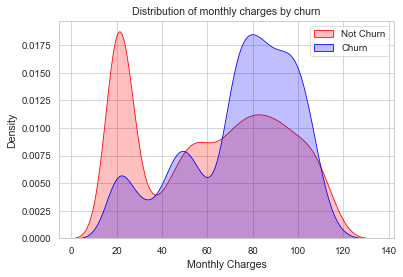

In [142]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df2['MonthlyCharges'][(df2["Churn"] ==0 )],
                color="Red", shade = True);
ax = sns.kdeplot(df2['MonthlyCharges'][(df2["Churn"] ==1) ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

**13. Total Charges**


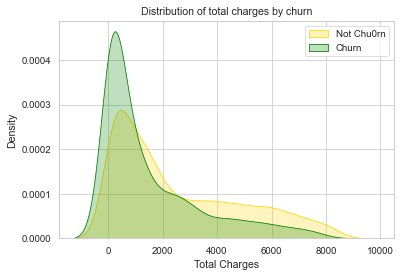

In [141]:
ax = sns.kdeplot(df2['TotalCharges'][(df2["Churn"] == 0) ],
                color="Gold", shade = True);
ax = sns.kdeplot(df2['TotalCharges'][(df2["Churn"] == 1) ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

**14.Tenure**

Newly joined customers are more likely to churn.

In [144]:
fig = px.box(df2, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=400, height=350,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

**Overall correlation**

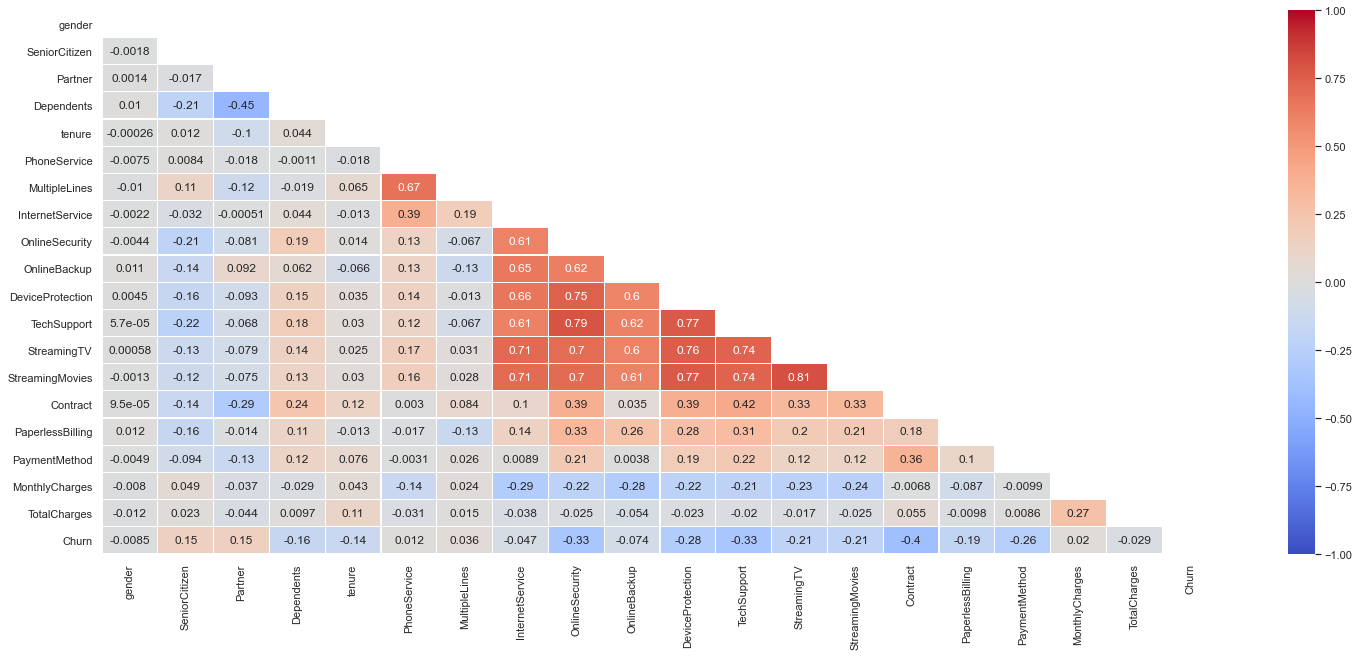

In [133]:
#correlation for Churn with other variables
plt.figure(figsize=(25, 10))
corr = df2.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

## 3. Predictive Modeling

### Data preprocessing

In [173]:
y = df_dum['Churn'].values 
X = df_dum.drop(columns = ['Churn'])

In [174]:
#scale all variables to [0,1]
features = X.columns.values 
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [175]:
#create train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [176]:
#compare results
performance = pd.DataFrame(columns=['Model Name','Accuracy score','F1 score'],) 

### Machine learning modeling

**1. Logistic regression**

In [177]:

m1 = LogisticRegression()
m1.fit(X_train, y_train)

LogisticRegression()

In [178]:
pred1 = m1.predict(X_test)
acc_lr = metrics.accuracy_score(y_test, pred1)
f1_lr = f1_score(y_test, pred1)
newResult = {'Model Name':'Logistic Regression','Accuracy score':acc_lr,'F1 score':f1_lr} 
performance = performance.append(newResult,ignore_index = True)
performance

,Model Name,Accuracy score,F1 score
0,Logistic Regression,0.807583,0.584867


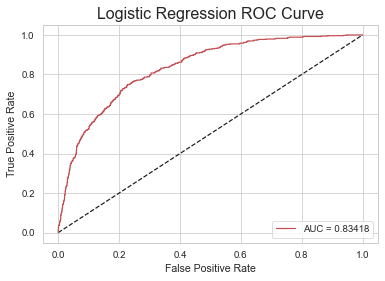

In [179]:
y_lrpred_prob = m1.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, y_lrpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
roc_auc = auc(fpr_lr, tpr_lr) 
plt.plot(fpr_lr, tpr_lr, color = "r", label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

AxesSubplot(0.125,0.125;0.775x0.755)


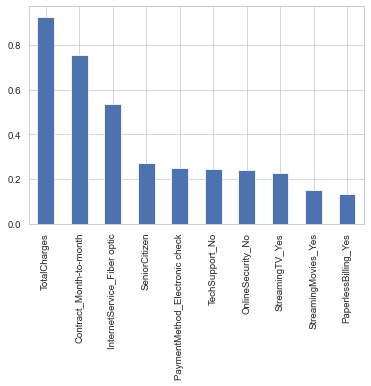

In [180]:
#weights of all variables
w1 = pd.Series(m1.coef_[0], index=X.columns.values)
print(w1.sort_values(ascending=False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


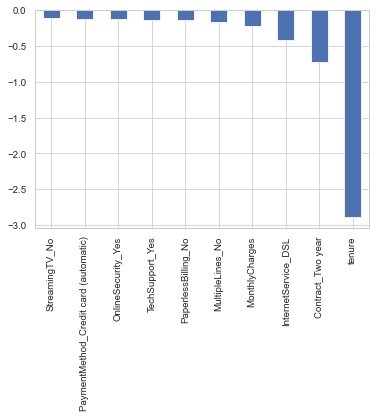

In [181]:
print(w1.sort_values(ascending=False)[-10:].plot(kind='bar'))

* Top positive influencers: **total charges, Month-by-month contract, internet service - fiber optic**, etc
* Top negative influencers: **tenure, 2-year contract, internet service - DSL**, etc

**2. Random Forest**

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
m2 = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=50, max_features='auto',max_leaf_nodes=30)
m2.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=30, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=50)

In [183]:
pred2 = m2.predict(X_test)
acc_rf = metrics.accuracy_score(y_test, pred2)
f1_rf = f1_score(y_test, pred2)
newResult = {'Model Name':'Random Forest','Accuracy score':acc_rf,'F1 score':f1_rf} 
performance = performance.append(newResult,ignore_index = True)
performance

,Model Name,Accuracy score,F1 score
0,Logistic Regression,0.807583,0.584867
1,Random Forest,0.808813,0.564019


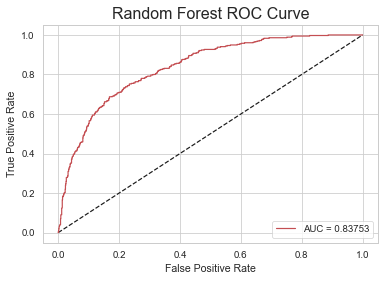

In [184]:
y_rfpred_prob = m2.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
roc_auc = auc(fpr_rf, tpr_rf) 
plt.plot(fpr_rf, tpr_rf, color = "r", label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

<AxesSubplot:>

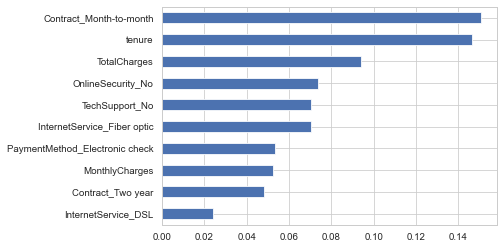

In [185]:
#importance of all variables
imp = m2.feature_importances_ 
w2 = pd.Series(imp, index = X.columns.values)
w2.sort_values(ascending=True)[-10:].plot(kind='barh')

* key variables: **month-by-month contract, tenure, total charges**; all these key factors are consistent with what we got from logistic regressions

**3. Support Vector Machine (SVM)**

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [187]:
m3 = SVC(kernel = 'linear')
m3.fit(X_train, y_train)

SVC(kernel='linear')

In [188]:
pred3 = m3.predict(X_test)
acc_svm = metrics.accuracy_score(y_test, pred3)
f1_svm = f1_score(y_test, pred3)
newResult = {'Model Name':'SVM','Accuracy score':acc_svm,'F1 score':f1_svm} 
performance = performance.append(newResult,ignore_index = True)
performance

,Model Name,Accuracy score,F1 score
0,Logistic Regression,0.807583,0.584867
1,Random Forest,0.808813,0.564019
2,SVM,0.820185,0.613740


In [189]:
#confusion matrix
print(confusion_matrix(y_test, pred3))

[[953  89]
 [164 201]]


**4. ADA Boost**

In [190]:
m4 = AdaBoostClassifier()
m4.fit(X_train, y_train)

AdaBoostClassifier()

In [191]:
pred4 = m4.predict(X_test)
acc_ada = metrics.accuracy_score(y_test, pred4)
f1_ada = f1_score(y_test, pred4)
newResult = {'Model Name':'Ada Boost','Accuracy score':acc_ada,'F1 score':f1_ada} 
performance = performance.append(newResult,ignore_index = True)
performance

,Model Name,Accuracy score,F1 score
0,Logistic Regression,0.807583,0.584867
1,Random Forest,0.808813,0.564019
2,SVM,0.820185,0.613740
3,Ada Boost,0.815920,0.594679


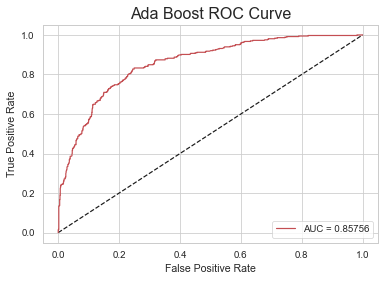

In [192]:
y_adapred_prob = m4.predict_proba(X_test)[:,1]
fpr_ada, tpr_ada, thresholds = roc_curve(y_test, y_adapred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
roc_auc = auc(fpr_ada, tpr_ada) 
plt.plot(fpr_ada, tpr_ada, color = "r", label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ada Boost ROC Curve',fontsize=16)
plt.show();

In [193]:
#confusion matrix
print(confusion_matrix(y_test, pred4))

[[958  84]
 [175 190]]


<AxesSubplot:>

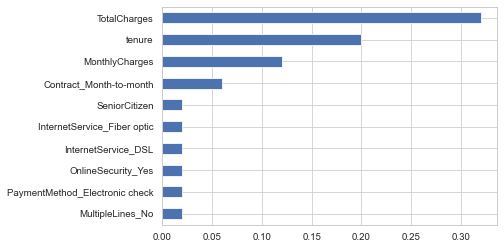

In [194]:
#feature importance
imp_ada = m4.feature_importances_ 
w4 = pd.Series(imp_ada, index = X.columns.values)
w4.sort_values(ascending=True)[-10:].plot(kind='barh')

**5. XG Boost**

In [195]:
m5 = XGBClassifier()
m5.fit(X_train, y_train)

[20:20:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [196]:
pred5 = m5.predict(X_test)
acc_xgb = metrics.accuracy_score(y_test, pred5)
f1_xgb = f1_score(y_test, pred5)
newResult = {'Model Name':'XGBoost','Accuracy score':acc_xgb,'F1 score':f1_xgb} 
performance = performance.append(newResult,ignore_index = True)
performance

,Model Name,Accuracy score,F1 score
0,Logistic Regression,0.807583,0.584867
1,Random Forest,0.808813,0.564019
2,SVM,0.820185,0.613740
3,Ada Boost,0.815920,0.594679
4,XGBoost,0.809524,0.598802


<AxesSubplot:>

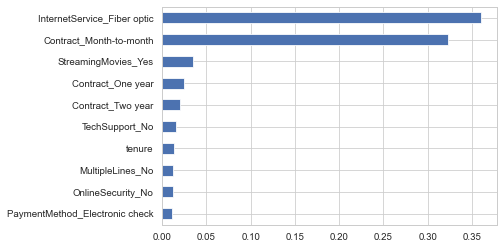

In [197]:
#feature importance
imp_xgb = m5.feature_importances_ 
w5 = pd.Series(imp_xgb, index = X.columns.values)
w5.sort_values(ascending=True)[-10:].plot(kind='barh')

**6. KNN**

In [198]:
m6 = KNeighborsClassifier(n_neighbors=11)
m6.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [199]:
pred6 = m6.predict(X_test)
acc_knn = metrics.accuracy_score(y_test, pred6)
f1_knn = f1_score(y_test, pred6)
newResult = {'Model Name':'KNN','Accuracy score':acc_knn,'F1 score':f1_knn} 
performance = performance.append(newResult,ignore_index = True)
performance

,Model Name,Accuracy score,F1 score
0,Logistic Regression,0.807583,0.584867
1,Random Forest,0.808813,0.564019
2,SVM,0.820185,0.613740
3,Ada Boost,0.815920,0.594679
4,XGBoost,0.809524,0.598802
5,KNN,0.784648,0.564029


**7. Decision Tree**

In [200]:
m7 = DecisionTreeClassifier()
m7.fit(X_train, y_train)

DecisionTreeClassifier()

In [201]:
pred7 = m7.predict(X_test)
acc_dt = metrics.accuracy_score(y_test, pred7)
f1_dt = f1_score(y_test, pred7)
newResult = {'Model Name':'Decision Tree','Accuracy score':acc_dt,'F1 score':f1_dt} 
performance = performance.append(newResult,ignore_index = True)
performance

,Model Name,Accuracy score,F1 score
0,Logistic Regression,0.807583,0.584867
1,Random Forest,0.808813,0.564019
2,SVM,0.820185,0.613740
3,Ada Boost,0.815920,0.594679
4,XGBoost,0.809524,0.598802
5,KNN,0.784648,0.564029
6,Decision Tree,0.732765,0.489130


**8. Gradient Boosting**

In [202]:
m8 = GradientBoostingClassifier()
m8.fit(X_train, y_train)

GradientBoostingClassifier()

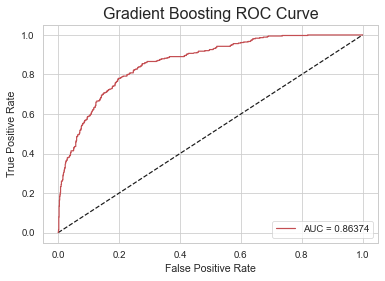

In [203]:
y_gbpred_prob = m8.predict_proba(X_test)[:,1]
fpr_gb, tpr_gb, thresholds = roc_curve(y_test, y_gbpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
roc_auc = auc(fpr_gb, tpr_gb) 
plt.plot(fpr_gb, tpr_gb, color = "r", label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve',fontsize=16)
plt.show();

In [204]:
pred8 = m8.predict(X_test)
acc_gb = metrics.accuracy_score(y_test, pred8)
f1_gb = f1_score(y_test, pred8)
newResult = {'Model Name':'Gradient Boosting','Accuracy score':acc_gb,'F1 score':f1_gb} 
performance = performance.append(newResult,ignore_index = True)
performance

,Model Name,Accuracy score,F1 score
0,Logistic Regression,0.807583,0.584867
1,Random Forest,0.808813,0.564019
2,SVM,0.820185,0.613740
3,Ada Boost,0.815920,0.594679
4,XGBoost,0.809524,0.598802
5,KNN,0.784648,0.564029
6,Decision Tree,0.732765,0.489130
7,Gradient Boosting,0.823028,0.616333


In [205]:
#confusion matrix
print(confusion_matrix(y_test, pred8))

[[958  84]
 [165 200]]


<AxesSubplot:>

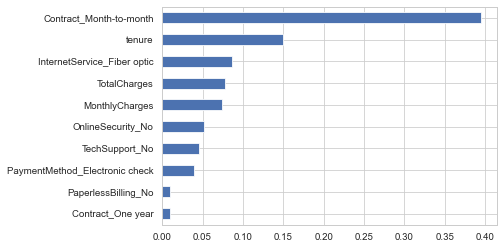

In [206]:
#feature importance
imp_gb = m8.feature_importances_ 
w8 = pd.Series(imp_gb, index = X.columns.values)
w8.sort_values(ascending=True)[-10:].plot(kind='barh')

## 4. Summary

* Gradient Boosting, SVM, and AdaBoost are the top performers
* Key factors towards churning rate may include: short contract (monthly vs yearly), tenure (joining length), total charges, etc

--------------

References:
1. Telecom Churn Prediction: https://www.kaggle.com/code/bandiatindra/telecom-churn-prediction
2. Customer churn prediction: https://www.kaggle.com/code/bhartiprasad17/customer-churn-prediction#-6.-Data-Visualization-
